## Accessing Text Corpora

In [ ]:
'''
A text corpus is a large body of text. Many corpora are designed to
contain a careful balance of material in one or more genres
'''

In [ ]:
import nltk
nltk.download('book')


In [5]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Gutenberg Corpus

In [6]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

len(emma)

192427

In [8]:
'''
a short program to display other information about each text, by looping
over all the values of fileid corresponding to the gutenberg file identifiers listed earlier
and then computing statistics for each text.
'''

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print(int(num_chars/num_words), int(num_words/num_sents), 
          int(num_words/num_vocab), fileid)

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


In [10]:
''' 
The raw() function gives us the contents of the file without
any linguistic processing.
'''

macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

## Brown Corpus

In [11]:
''' 
The Brown Corpus was the first million-word electronic corpus of English, created in
1961 at Brown University. This corpus contains text from 500 sources, and the sources
have been categorized by genre, such as news, editorial, and so on
'''

from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

![screenshot](image.png)

In [12]:
brown.words(categories='religion')

['As', 'a', 'result', ',', 'although', 'we', 'still', ...]

In [17]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [21]:
news_text = brown.words(categories='news')
freq_dist = nltk.FreqDist([w.lower() for w in news_text])
modals = ['can', 'could', 'may', 'might', 'must', 'will']
wh_words = ['which', 'what', 'why', 'who', 'where', 'whom']

for m in modals:
    print(m + ":", freq_dist[m])

print("-----------------------------------")
for q in wh_words:
    print(q + ":", freq_dist[q])
    

can: 94
could: 87
may: 93
might: 38
must: 53
will: 389
-----------------------------------
which: 245
what: 95
why: 14
who: 268
where: 59
whom: 8


In [22]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']

cfd.tabulate(conditions=genres, samples=modals)


                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


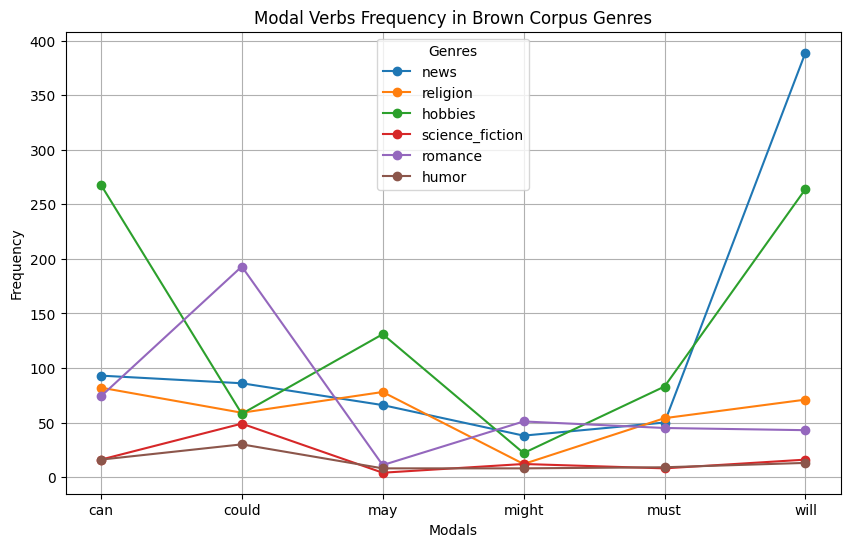

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for genre in genres:
    frequencies = [cfd[genre][modal] for modal in modals]
    plt.plot(modals, frequencies, label=genre, marker='o')

plt.title("Modal Verbs Frequency in Brown Corpus Genres")
plt.xlabel("Modals")
plt.ylabel("Frequency")
plt.legend(title="Genres")
plt.grid(True)
plt.show()

## Corpora in Other Languages

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

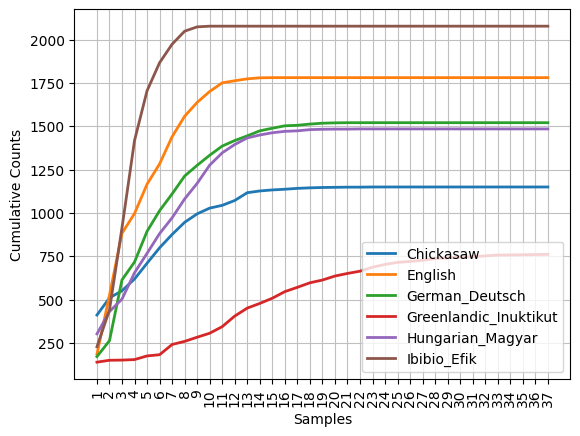

In [26]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
            'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

## Loading your own Corpus


In [27]:
from nltk.corpus import PlaintextCorpusReader

In [28]:
corpus_root = '/usr/share/dict'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

[]

## A Pronouncing Dictionary

In [31]:
'''
A slightly richer kind of lexical resource is a table (or spreadsheet), containing a word
plus some properties in each row. NLTK includes the CMU Pronouncing Dictionary
for U.S. English, which was designed for use by speech synthesizers.
'''

entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [30]:
for entry in entries[10000:10100]:
    print(entry)

('belford', ['B', 'EH1', 'L', 'F', 'ER0', 'D'])
('belfry', ['B', 'EH1', 'L', 'F', 'R', 'IY0'])
('belgacom', ['B', 'EH1', 'L', 'G', 'AH0', 'K', 'AA0', 'M'])
('belgacom', ['B', 'EH1', 'L', 'JH', 'AH0', 'K', 'AA0', 'M'])
('belgard', ['B', 'EH0', 'L', 'G', 'AA1', 'R', 'D'])
('belgarde', ['B', 'EH0', 'L', 'G', 'AA1', 'R', 'D', 'IY0'])
('belge', ['B', 'EH1', 'L', 'JH', 'IY0'])
('belger', ['B', 'EH1', 'L', 'G', 'ER0'])
('belgian', ['B', 'EH1', 'L', 'JH', 'AH0', 'N'])
('belgians', ['B', 'EH1', 'L', 'JH', 'AH0', 'N', 'Z'])
('belgique', ['B', 'EH0', 'L', 'ZH', 'IY1', 'K'])
("belgique's", ['B', 'EH0', 'L', 'JH', 'IY1', 'K', 'S'])
('belgium', ['B', 'EH1', 'L', 'JH', 'AH0', 'M'])
("belgium's", ['B', 'EH1', 'L', 'JH', 'AH0', 'M', 'Z'])
('belgo', ['B', 'EH1', 'L', 'G', 'OW2'])
('belgrade', ['B', 'EH1', 'L', 'G', 'R', 'EY0', 'D'])
('belgrade', ['B', 'EH1', 'L', 'G', 'R', 'AA2', 'D'])
("belgrade's", ['B', 'EH1', 'L', 'G', 'R', 'EY0', 'D', 'Z'])
("belgrade's", ['B', 'EH1', 'L', 'G', 'R', 'AA2', 'D', 'Z'

## WordNet

In [34]:


''' 
motorcar has just one possible meaning and it is identified as car.n.01, the first
noun sense of car.
'''

from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [36]:
print(wn.synset('car.n.01').lemma_names)

<bound method Synset.lemma_names of Synset('car.n.01')>
